# Reading the Dataset

In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Reading the dataset
data = pd.read_csv('/content/Profit.csv')

In [ ]:
'''
Alternatively, this dataset can be read from AIM Mock datasets using the below line of code

data = pd.read_csv(
    'https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Profit.csv'
    )
'''

"\nAlternatively, this dataset can be read from AIM Mock datasets using the below line of code\n\ndata = pd.read_csv(\n    'https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Profit.csv'\n    )\n"

In [ ]:
# Top 5 rows of the data
data.head()

,Marketing Spend,Profit
0,471784.10,192261.83
1,443898.53,191792.06
2,407934.54,191050.39
3,383199.62,182901.99
4,366168.42,166187.94


In [ ]:
# Checking the shape of the data
print('Shape of the dataset (No. of rows, No. of columns):', data.shape)

Shape of the dataset (No. of rows, No. of columns): (200, 2)


# Defining the input-output and training-test features

In [ ]:
# Defining input and output features
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [ ]:
# Checking the shape of input and output features
print('Shape of the input features:', X.shape)
print('Shape of the output features:', y.shape)

Shape of the input features: (200, 1)
Shape of the output features: (200,)


In [ ]:
# Defining the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
# Checking the shape of the training and test sets
print('Shape of the training input data:', X_train.shape)
print('Shape of the training output data:', y_train.shape)
print('Shape of the test input data:', X_test.shape)
print('Shape of the test output data:', y_test.shape)

Shape of the training input data: (180, 1)
Shape of the training output data: (180,)
Shape of the test input data: (20, 1)
Shape of the test output data: (20,)


# Defining and training and decision tree regression model

In [ ]:
# Defining a decision tree regression model
from sklearn.tree import DecisionTreeRegressor

# Training tge decision tree regression model
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

# Predicting and evaluating the predictions

In [ ]:
# Making predictions on the test data
y_pred = regressor.predict(X_test)

In [ ]:
# Comparing the predicted profits with actual profits
pd.DataFrame(data={'Predicted Profit': y_pred, 'Actual Profit': y_test})

,Predicted Profit,Actual Profit
0,64966.080,64926.08
1,129917.040,129917.04
2,99937.590,99937.59
3,152211.770,152161.77
4,103282.380,103322.38
5,129917.040,129957.04
6,55848.628,122776.86
7,118474.030,118424.03
8,108552.040,108502.04
9,64966.080,64926.08


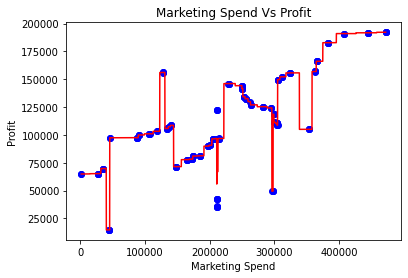

In [ ]:
# Visualizing the performance
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_grid, regressor.predict(X_grid), color = 'red')
plt.title('Marketing Spend Vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

In [ ]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE)

Mean Squared Error is: 223970731.93229112


In [ ]:
# Root Mean Squared Error (RMSE)
import math
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error is:', RMSE)

Root Mean Squared Error is: 14965.651737638796
